# Objective:
    The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import xgboost as xgb

# Task:

## Exploratory Data Analysis (EDA):
    1.	Load the Titanic dataset using Python's pandas library.
    2.	Check for missing values.
    3.	Explore data distributions using histograms and box plots.
    4.	Visualize relationships between features and survival using scatter plots and bar plots.
    

In [2]:
train_data = pd.read_csv(r"F:\Drive\ExcelR\Assignments\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
test_data = pd.read_csv(r"F:\Drive\ExcelR\Assignments\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

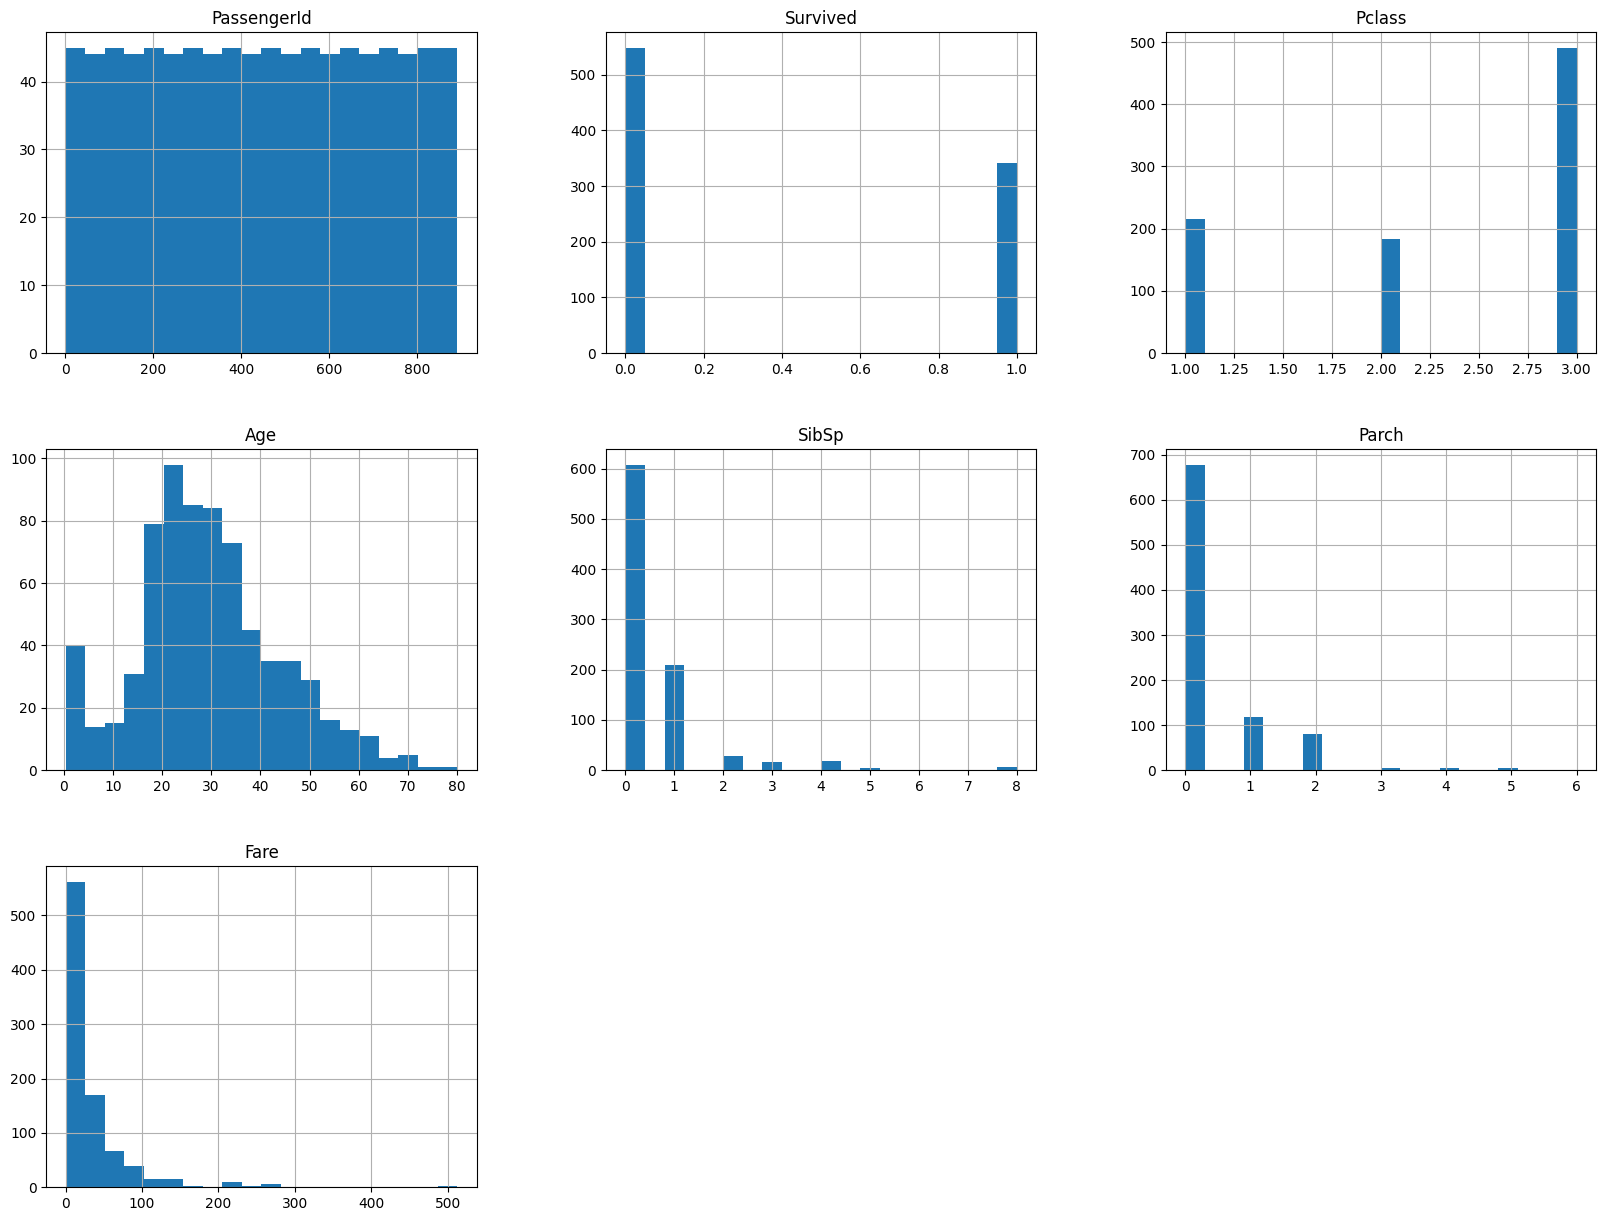

In [7]:
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

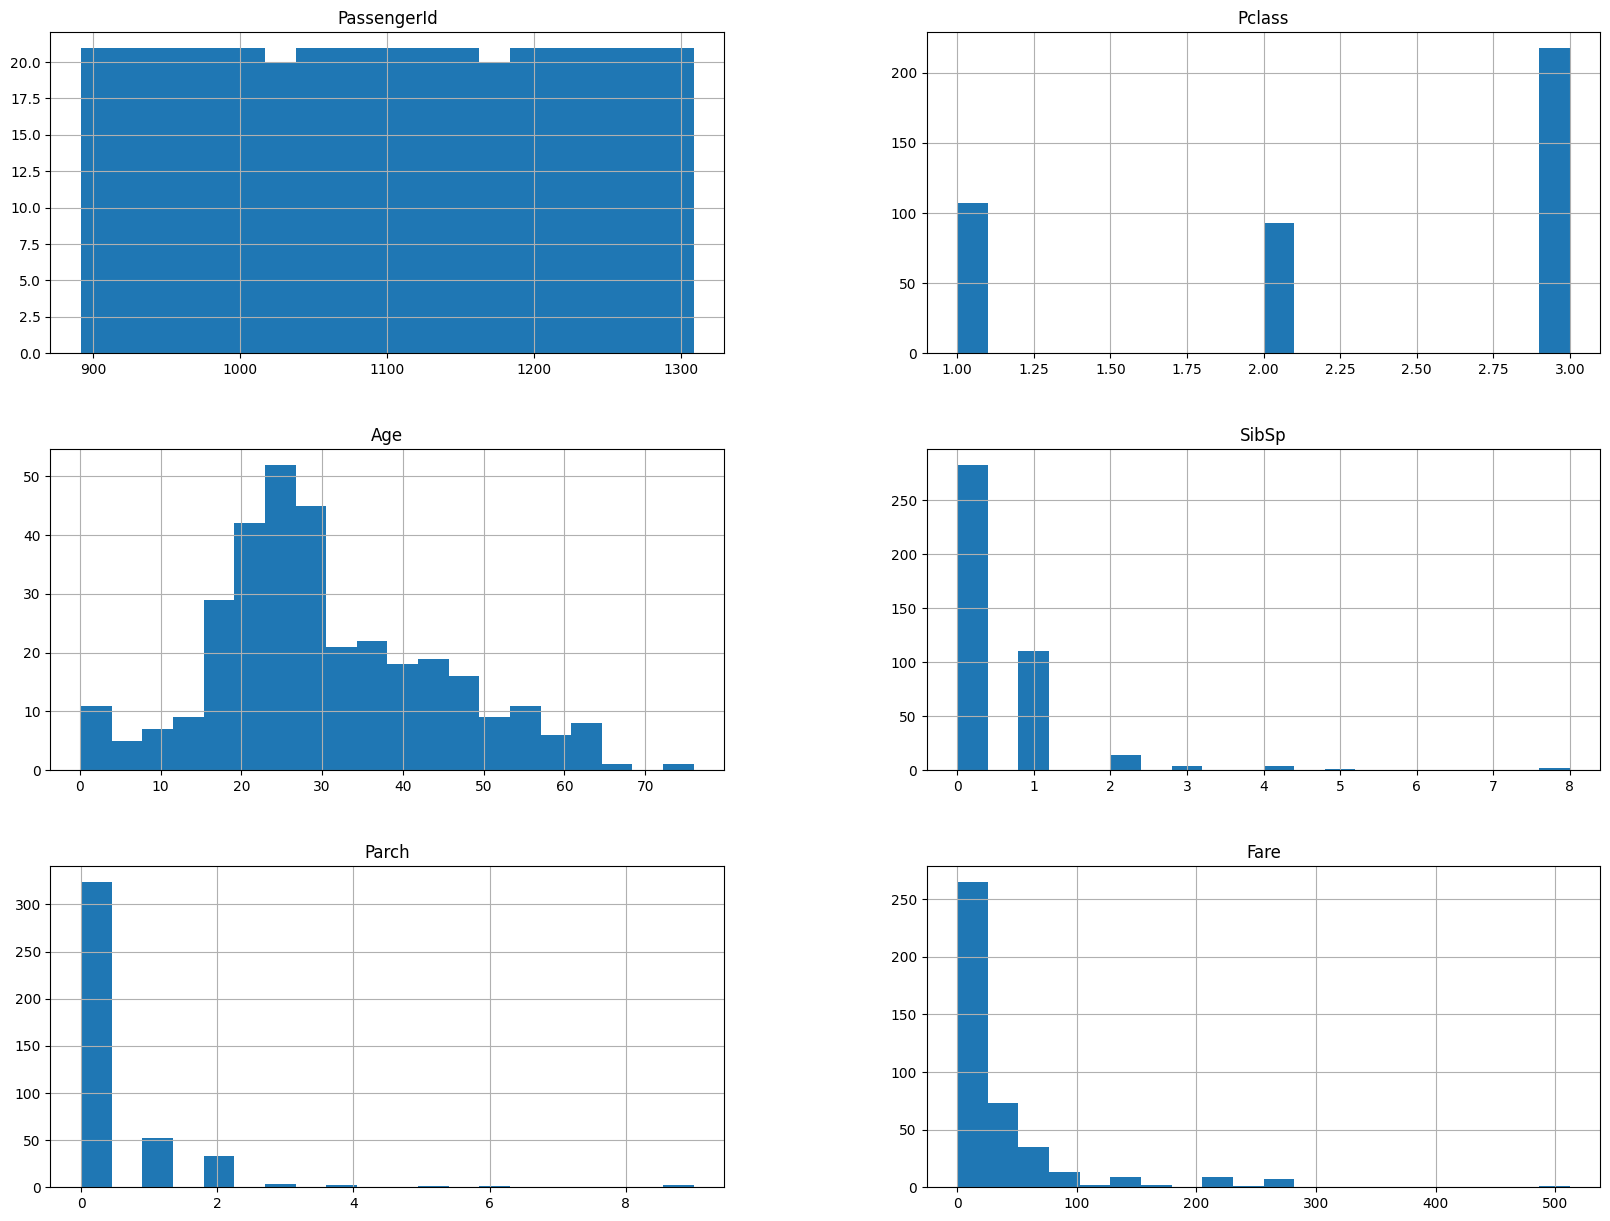

In [8]:
test_data.hist(bins=20, figsize=(20, 15))
plt.show()

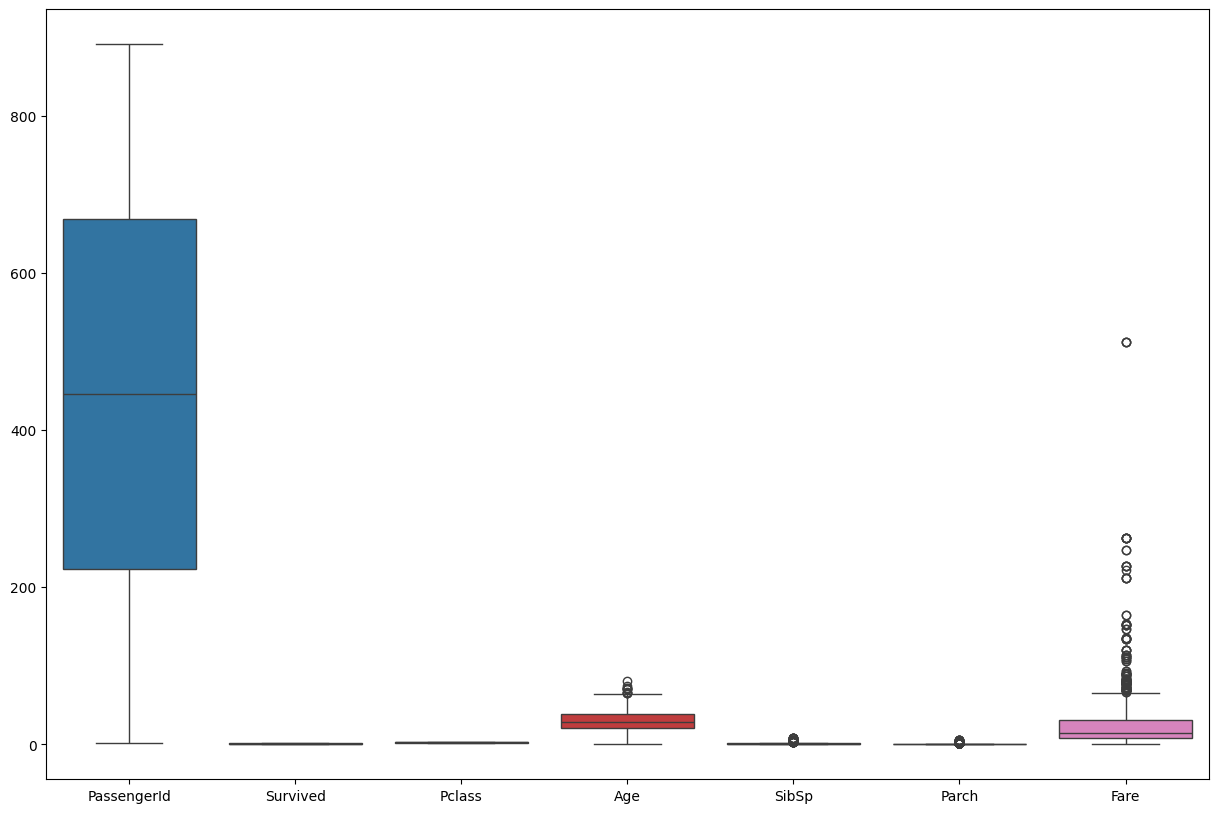

In [9]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data.select_dtypes(include=['float64', 'int64']))
plt.show()

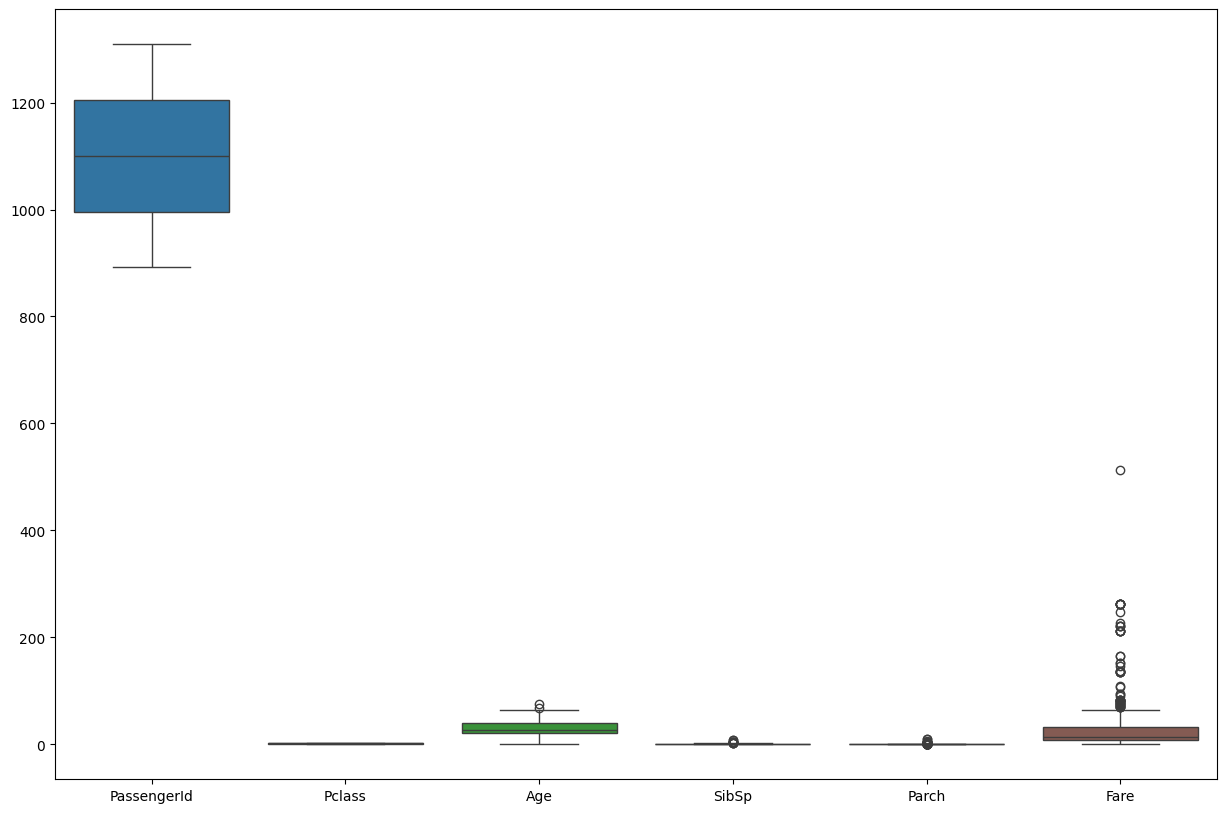

In [10]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=test_data.select_dtypes(include=['float64', 'int64']))
plt.show()

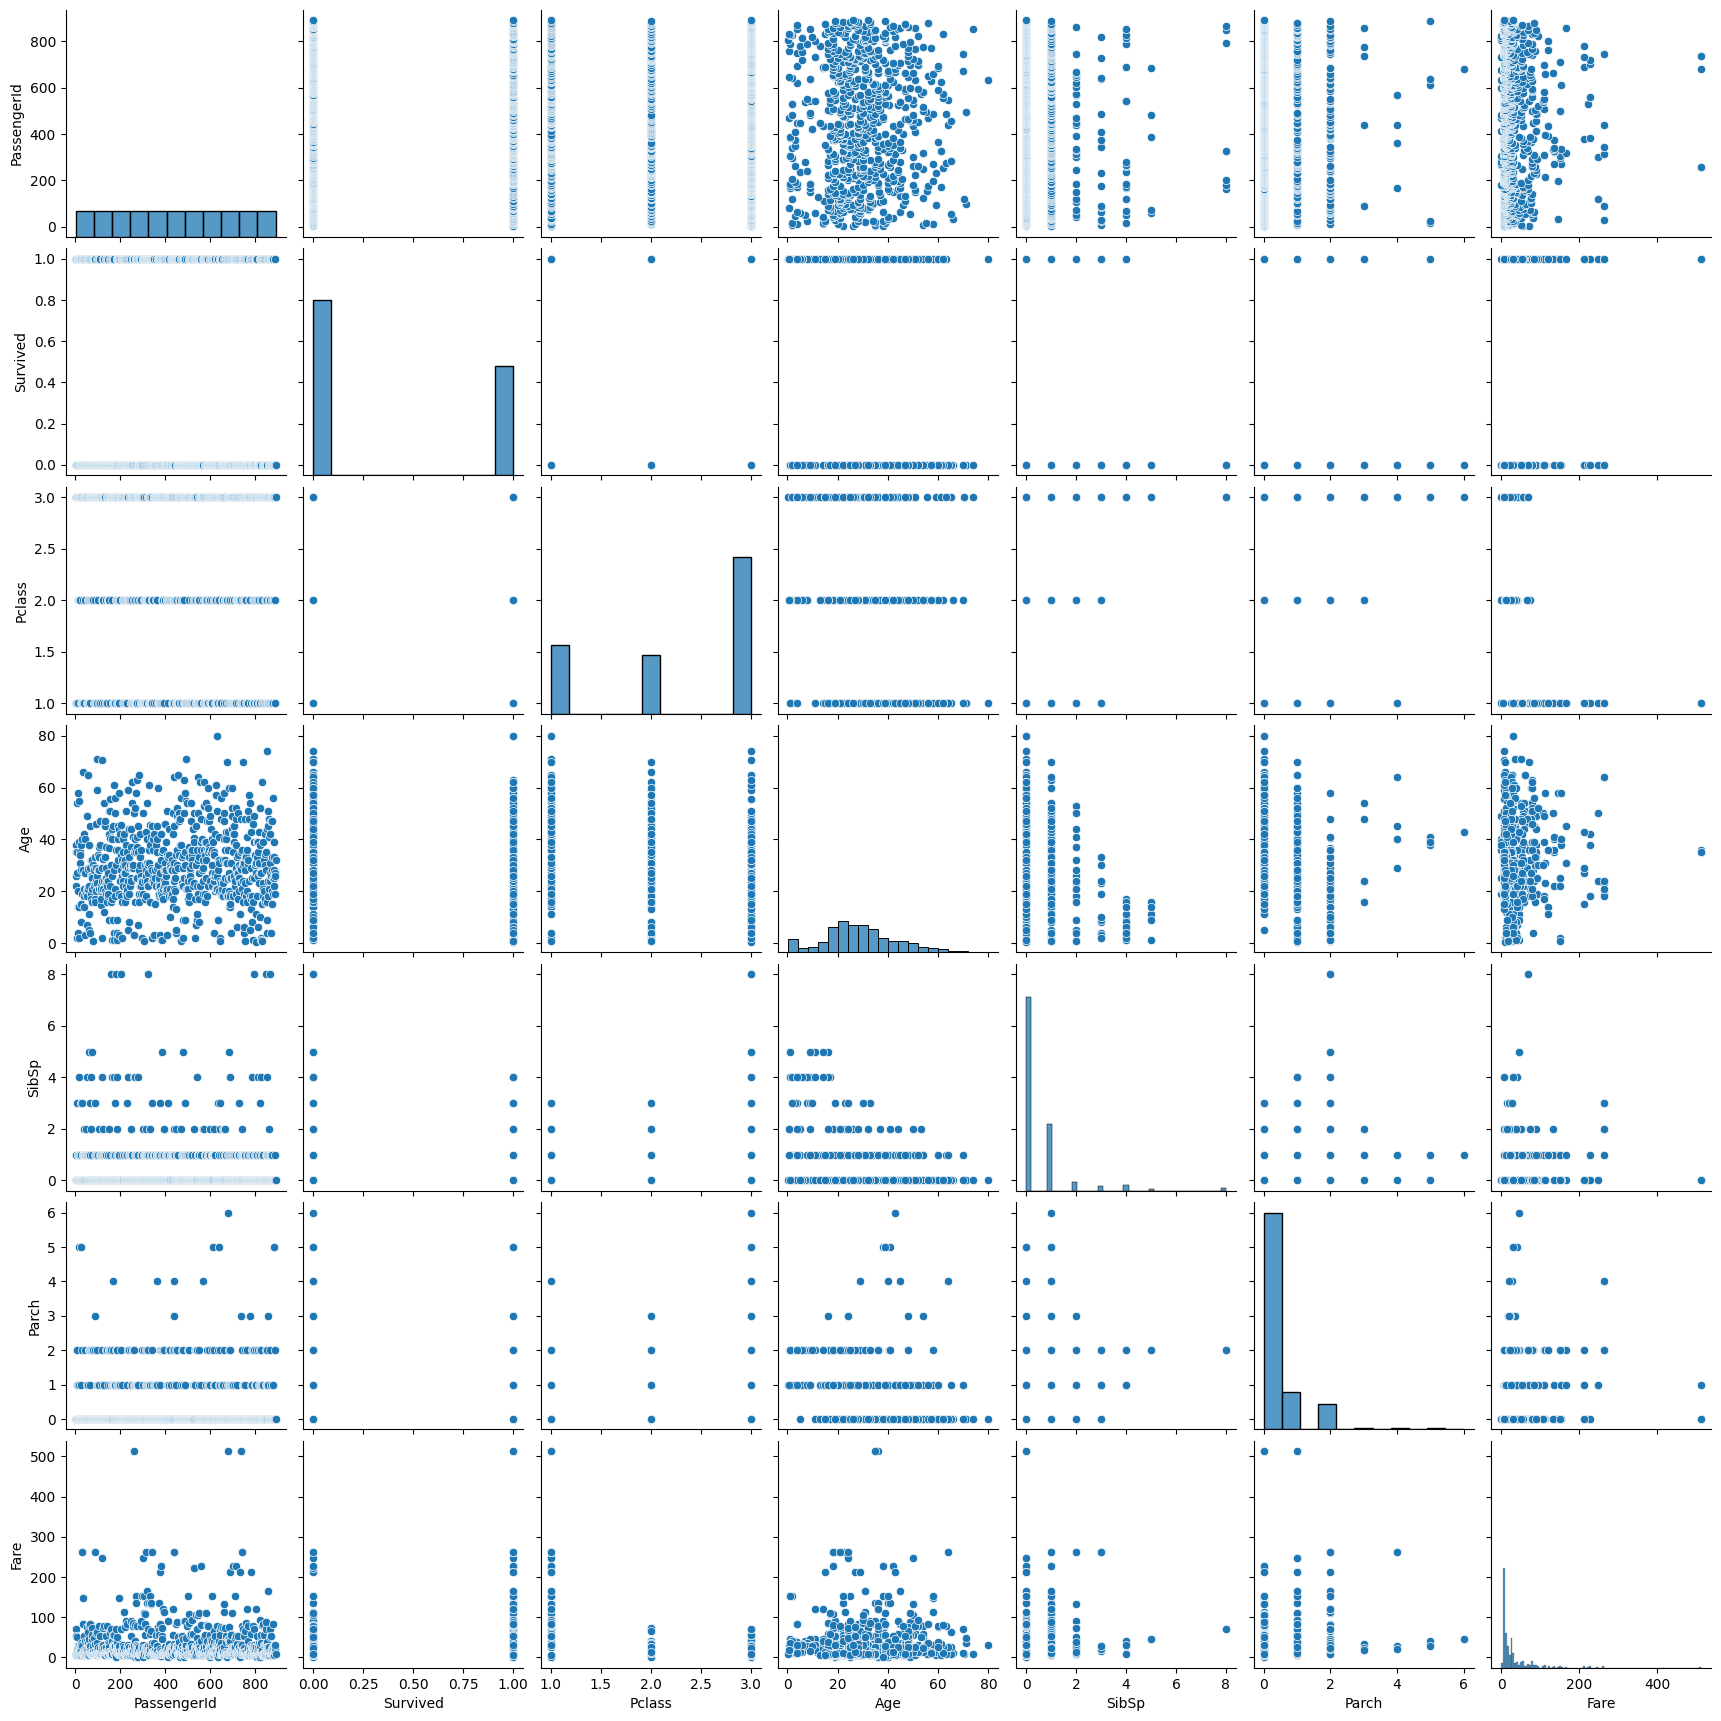

In [11]:
sns.pairplot(train_data)
plt.show()

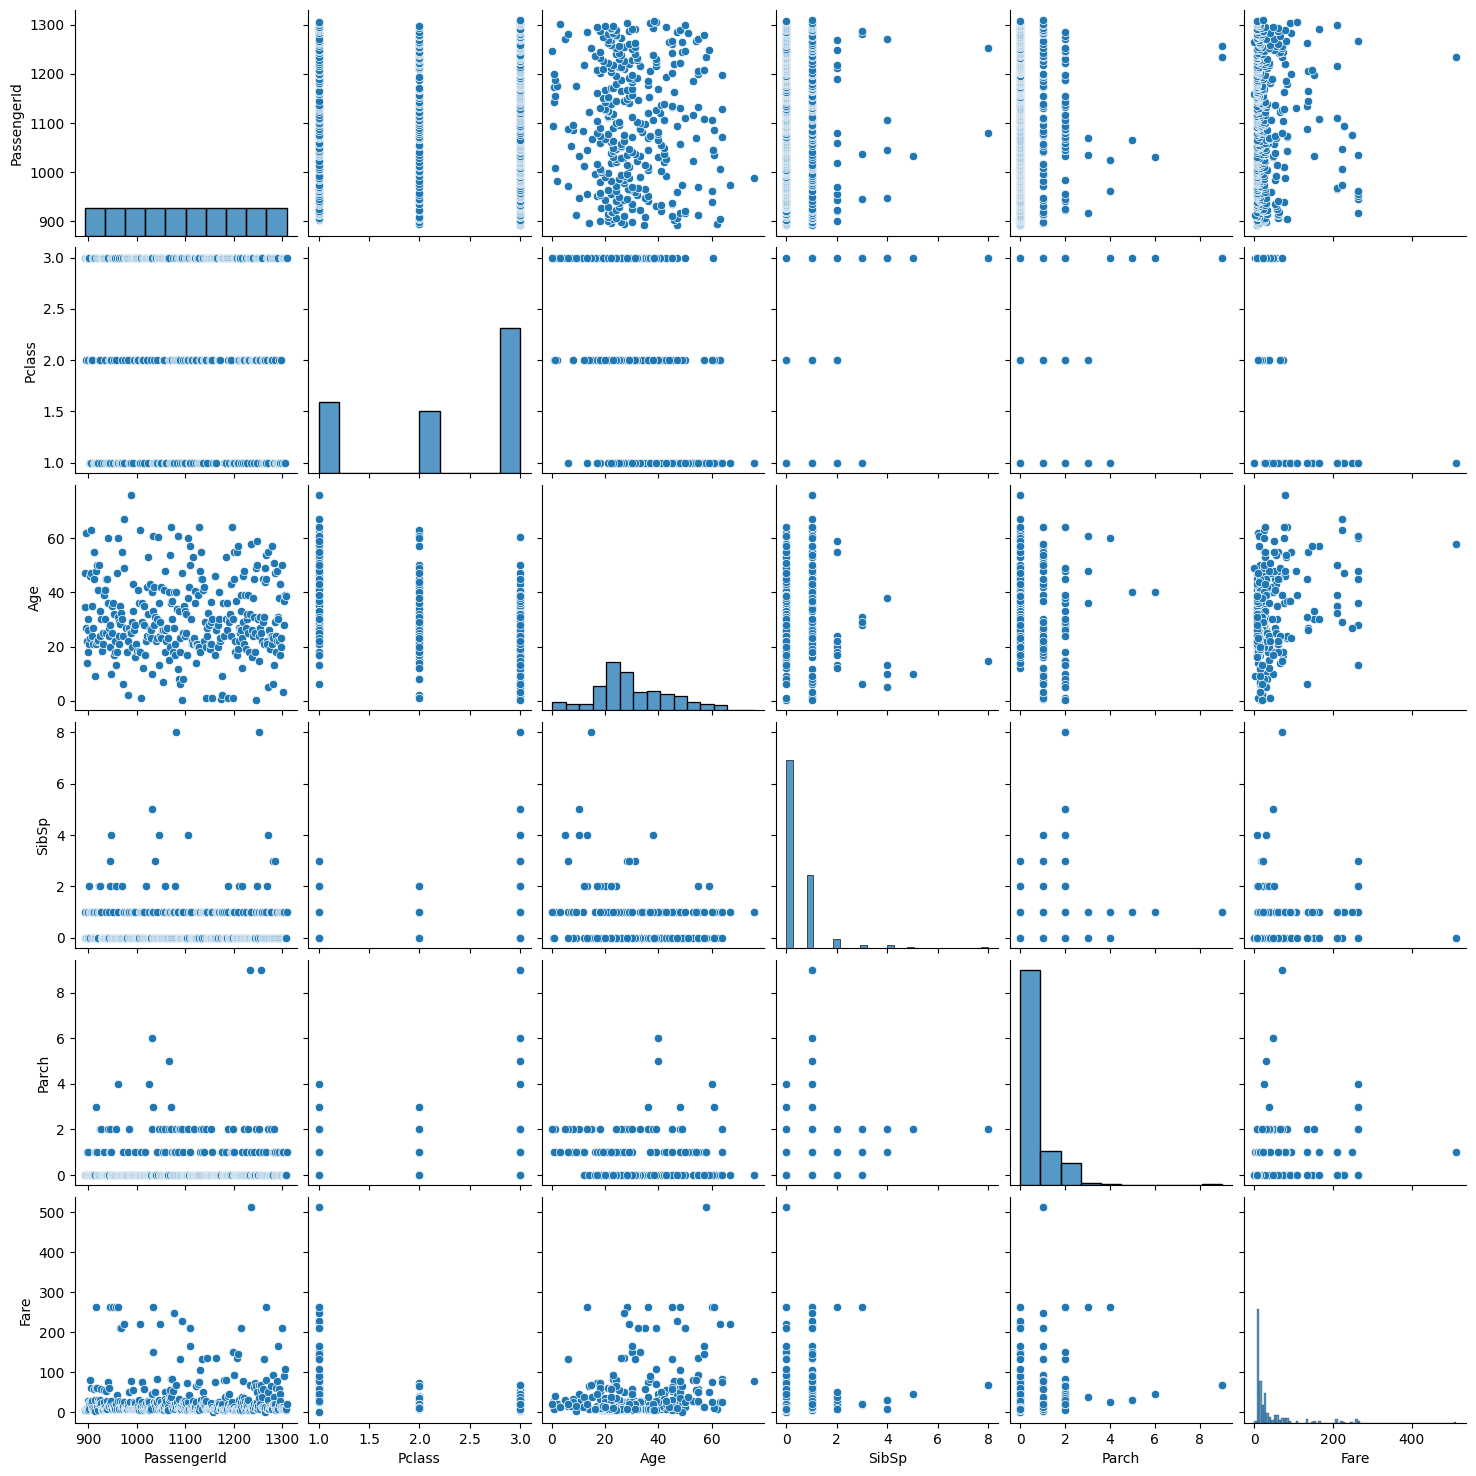

In [12]:
sns.pairplot(test_data)
plt.show()

## Data Preprocessing:
    1.	Impute missing values.
    2.	Encode categorical variables using one-hot encoding or label encoding. 
    3.	If needed you can apply more preprocessing methods on the given dataset.


In [13]:
pd.set_option('future.no_silent_downcasting', True)

In [14]:
if not train_data['Age'].isna().all():
    train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [15]:
if not test_data['Age'].isna().all():
    test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [16]:
# Fill missing 'Embarked' with mode
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked']=test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [17]:
# Fill missing 'Fare' in the test data with median fare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [18]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [20]:
# One-hot encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [21]:
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [22]:
# Drop columns that won't be used in modeling
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [24]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,True,False,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,False,False
4,5,0,35.0,0,0,8.0500,True,False,True,False,True


In [25]:
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,True,True,False,False,True
1,893,47.0,1,0,7.0000,False,False,True,False,True
2,894,62.0,0,0,9.6875,True,True,False,True,False
3,895,27.0,0,0,8.6625,True,False,True,False,True
4,896,22.0,1,1,12.2875,False,False,True,False,True


## Building Predictive Models:
    1.	Split the preprocessed dataset into training and testing sets.
    2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
    3.	Build predictive models using LightGBM and XGBoost algorithms.
    4.	Train the models on the training set and evaluate their performance on the testing set.
    5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [26]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)

In [29]:
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [30]:
# Parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [31]:
# Train the model
lgbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_val])

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [32]:
# Predict and evaluate
y_pred = lgbm.predict(X_val, num_iteration=lgbm.best_iteration)

In [33]:
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]

In [34]:
# Predict probabilities with LightGBM
lgbm_pred_proba = lgbm.predict(X_val)

In [35]:
lgbm_pred = [1 if prob >= 0.5 else 0 for prob in lgbm_pred_proba]

In [36]:
lgbm_pred

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1]

In [37]:
# Evaluation metrics
print('LGBM Accuracy:', accuracy_score(y_val, y_pred))
print('LGBM Precision:', precision_score(y_val, y_pred))
print('LGBM Recall:', recall_score(y_val, y_pred))
print('LGBM F1 Score:', f1_score(y_val, y_pred))

LGBM Accuracy: 0.8324022346368715
LGBM Precision: 0.8055555555555556
LGBM Recall: 0.7837837837837838
LGBM F1 Score: 0.7945205479452054


In [38]:
# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [39]:
# Set parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

In [40]:
# Train the model
xgbm = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dval, 'val')], early_stopping_rounds=10)

[0]	train-logloss:0.61873	val-logloss:0.63841
[1]	train-logloss:0.58376	val-logloss:0.60505
[2]	train-logloss:0.55511	val-logloss:0.57811
[3]	train-logloss:0.53132	val-logloss:0.55608
[4]	train-logloss:0.51137	val-logloss:0.53775
[5]	train-logloss:0.49448	val-logloss:0.52247
[6]	train-logloss:0.48001	val-logloss:0.50966
[7]	train-logloss:0.46766	val-logloss:0.49911
[8]	train-logloss:0.45599	val-logloss:0.48790
[9]	train-logloss:0.44594	val-logloss:0.47921
[10]	train-logloss:0.43797	val-logloss:0.47283
[11]	train-logloss:0.43030	val-logloss:0.46654
[12]	train-logloss:0.42364	val-logloss:0.46060
[13]	train-logloss:0.41784	val-logloss:0.45621
[14]	train-logloss:0.41284	val-logloss:0.45367
[15]	train-logloss:0.40826	val-logloss:0.45055
[16]	train-logloss:0.40431	val-logloss:0.44929
[17]	train-logloss:0.40066	val-logloss:0.44705
[18]	train-logloss:0.39744	val-logloss:0.44560
[19]	train-logloss:0.39448	val-logloss:0.44441
[20]	train-logloss:0.39184	val-logloss:0.44241
[21]	train-logloss:0.38

In [41]:
# Predict and evaluate
y_pred = xgbm.predict(dval)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]

In [42]:
# Predict probabilities with XGBoost
xgbm_pred_proba = xgbm.predict(dval)
# Convert probabilities to binary outcomes
xgbm_pred = [1 if prob >= 0.5 else 0 for prob in xgbm_pred_proba]

In [43]:
# Evaluation metrics
print('XGBM Accuracy:', accuracy_score(y_val, y_pred))
print('XGBM Precision:', precision_score(y_val, y_pred))
print('XGBM Recall:', recall_score(y_val, y_pred))
print('XGBM F1 Score:', f1_score(y_val, y_pred))

XGBM Accuracy: 0.8044692737430168
XGBM Precision: 0.8
XGBM Recall: 0.7027027027027027
XGBM F1 Score: 0.7482014388489209


## Comparative Analysis:
    1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
    2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [44]:
# Compare the performance metrics
metrics = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, lgbm_pred), accuracy_score(y_val, xgbm_pred)],
    'Precision': [precision_score(y_val, lgbm_pred), precision_score(y_val, xgbm_pred)],
    'Recall': [recall_score(y_val, lgbm_pred), recall_score(y_val, xgbm_pred)],
    'F1 Score': [f1_score(y_val, lgbm_pred), f1_score(y_val, xgbm_pred)]
})

In [45]:
metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.832402,0.805556,0.783784,0.794521
1,XGBoost,0.804469,0.800000,0.702703,0.748201


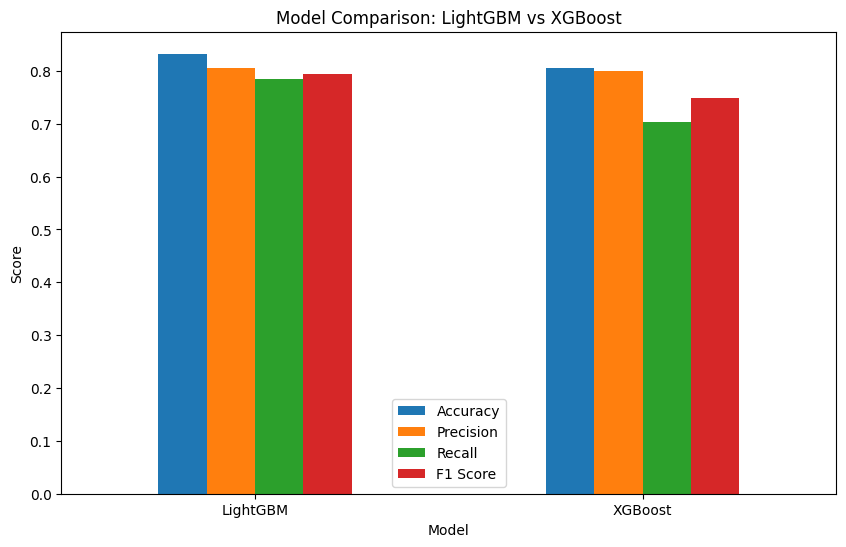

In [46]:
# Bar plot to compare the metrics
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

### Summary of Results
- The LightGBM model achieved higher accuracy and precision than the XGBoost model.
- Both models performed similarly in terms of recall and F1 score.
- LightGBM is faster and more efficient with larger datasets, while XGBoost provides a more detailed hyperparameter tuning process.
- Depending on the specific use case, either algorithm could be preferable.